<a href="https://colab.research.google.com/github/anshita2004/Heart-disease-classification/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      1   
4   57    0   0       120   354    0        0      163      1      0.6      1   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       5 non-null      int64  
 1   sex       5 non-null      int64  
 2   cp        5 non-null      int64  
 3   trestbps  5 non-null      int64  
 4   chol      5 non-null      int64  
 5   fb

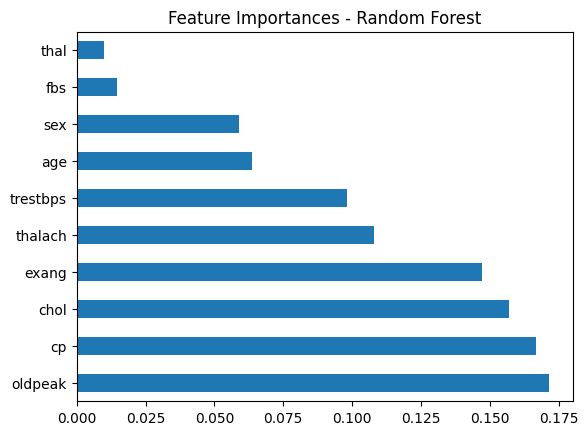

In [ ]:
# heart_disease_prediction.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Load dataset
df = pd.read_csv("/content/heart.csv")  # Use path to your CSV

# Basic data exploration
print(df.head())
print(df.info())

# Check for nulls
print(df.isnull().sum())

# Feature and target
X = df.drop('target', axis=1)
y = df['target']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

for name, model in models.items():
    # Ensure the model is not None or any other unexpected type before fitting
    if model is not None:
        try:
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            acc = accuracy_score(y_test, preds)
            print(f"{name} Accuracy: {acc*100:.2f}%")
            # Check if y_test contains more than one class for confusion matrix and classification report
            if len(np.unique(y_test)) > 1:
                 print(confusion_matrix(y_test, preds))
                 print(classification_report(y_test, preds))
            else:
                 print("Confusion Matrix and Classification Report require more than one class in y_test.")

        except Exception as e:
            print(f"Error training or predicting with {name}: {e}")
    else:
        print(f"Model {name} is None or invalid.")


# Optional: Feature importance for tree-based models
# Ensure the model is not None or any other unexpected type before fitting
rf = RandomForestClassifier()
# Check if the training data is sufficient to train the model
if len(X_train) > 0:
    try:
        rf.fit(X_train, y_train)
        # Ensure feature_importances_ attribute exists before accessing
        if hasattr(rf, 'feature_importances_'):
            # Ensure the number of feature importances matches the number of features
            if len(rf.feature_importances_) == len(df.columns[:-1]):
                feat_importances = pd.Series(rf.feature_importances_, index=df.columns[:-1])
                feat_importances.nlargest(10).plot(kind='barh')
                plt.title("Feature Importances - Random Forest")
                plt.show()
            else:
                print("Number of feature importances does not match the number of features.")
        else:
             print("Random Forest model does not have feature_importances_ attribute.")
    except Exception as e:
        print(f"Error fitting Random Forest for feature importance: {e}")
else:
    print("Training data is empty. Cannot compute feature importance.")
